### A prototyping notebook for quickly testing and troubleshooting new functions or issues

#### Imports

In [9]:
import os
import src.api_call as ac
import pandas as pd
import src.text_process as tp
from sklearn.model_selection import train_test_split
import src.bert_model as bm
import src.model_evaluation as me
from pathlib import Path
import tensorflow as tf
import tensorflow_text as tf_text
import matplotlib.pyplot as plt
import seaborn as sns

#### API test section

In [2]:
# Change to true if testing API code
testing_api = False
if testing_api:
    ''' include API test code here'''

else:
    # Default to locally saved text data
    print ('Using local test files')
    test_set = {
    'Blockchain':0,
    'Cryptocurrency':1, 
    'Genetic engineering':2, 
    'Machine learning':3, 
    'Nanotechnology':4, 
    'Quantum computing':5, 
    'Robotics':6, 
    'Social engineering':7, 
    'Space exploration':8, 
    'Virtual reality':9
    }
    


Using local test files


#### Text processing

In [3]:
# Change to true if testing text processing
testing_text_process = False

if testing_text_process:
    '''text processing tests here'''
else:
    # Default to saved preprocessed text used in control model
    all_text = pd.read_csv('control/sample_data/clean_data.csv')

#### Model building

In [4]:
testing_model = False

#define train/test split
x_train,x_test,y_train,y_test = train_test_split(all_text['Text'],all_text['Code'])

if testing_model:
    #generate a model
    model = bm.generate_model(len(test_set))

    #train model
    model_history, train_time, eval = bm.compile_fit_evaluate(model, x_train, y_train, x_test, y_test)
else:
    # Default to the pretrained/saved model used in control model
    model = tf.keras.models.load_model('control/model')
    print ('model loaded')



model loaded


#### Evaluation

In [5]:
# generate predictions
predictions = model.predict(x_test)


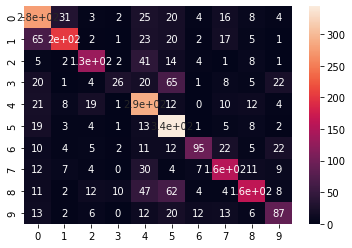

In [10]:
testing_evaluation = True

if testing_evaluation:
    confusion_mtx = me.confusion_matrix(predictions, y_test)
    sns.heatmap(confusion_mtx, annot=True)
    plt.savefig(f'control/confusion_matrix.png', dpi = 400)
else:
    # Default to evaluation used in main

    #generate confusion matrix, save to local file (will overwrite previous)

    me.confusion_matrix(model, x_test, y_test, 'control')

    # save text and model information (will overwrite previous)
    # me.save_model_data(model,eval,model_history, 'control')